<a href="https://colab.research.google.com/github/monali-2210/ABInBev-sell/blob/main/ABInBev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df = df.iloc[:,1:]

In [4]:
df.head(5)

,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,MACO/HL,...,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
0,2021-01-11 00:00:00,10949,7.0,29606876,351.0,23.0,7,1,1,155.689825,...,"6,000 L",Blonde,PREMIUM,60.6455,7.9619,8.1,21.637448,17.082,16.614540,0.0
1,2021-01-11 00:00:00,19901,3.0,29606876,147.0,10.4,7,1,1,146.207904,...,NaN,NaN,NaN,60.6455,7.9619,6.5,20.896467,16.188,15.997056,0.0
2,2021-01-11 00:00:00,80179,6.0,29606876,280.0,17.8,7,1,1,97.872307,...,NaN,NaN,NaN,60.6455,7.9619,0.0,15.779859,11.868,11.733216,0.0
3,2021-01-11 00:00:00,66992,2.0,29606876,75.0,4.2,7,1,1,200.334035,...,"6,000 L",-,SUPER PREMIUM,60.6455,7.9619,9.5,25.496000,19.830,19.830000,0.0
4,2021-01-08 00:00:00,11769,72.0,29378797,72.0,6.2,6,1,1,147.902378,...,NaN,NaN,NaN,60.6978,7.2423,6.7,20.859200,15.966,15.966000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73670 entries, 0 to 73669
Data columns (total 31 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Doc. Date                                                               73670 non-null  object 
 1   Material                                                                73670 non-null  int64  
 2   Order qty                                                               73670 non-null  float64
 3   Ship-to nu                                                              73670 non-null  int64  
 4   PCS delivered                                                           73670 non-null  float64
 5   HL delivered                                                            73670 non-null  float64
 6   delivery_days                                                           73670 

## **Some of the popular materials we got!!**
   * material id --> purchase
   * 11577  --> 3562
   * 10949  --> 3561
   * 3375   --> 2954
   * 9977   --> 2666
   * 19901  --> 2606
   * 3413   --> 2500

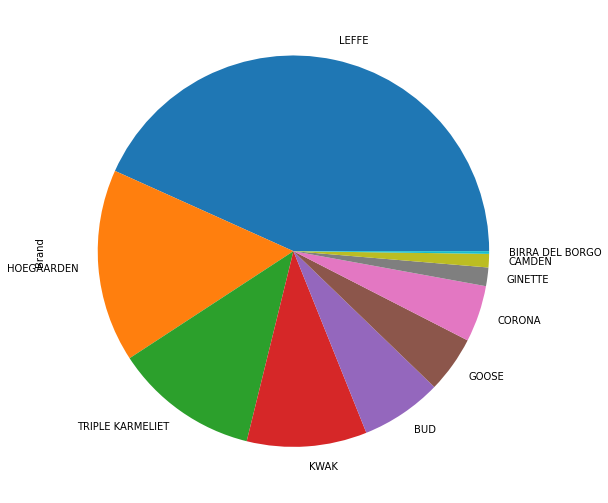

In [8]:
df['Brand'].value_counts().plot(kind='pie', figsize=(9,9))

In [9]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     print(popularity_materials)

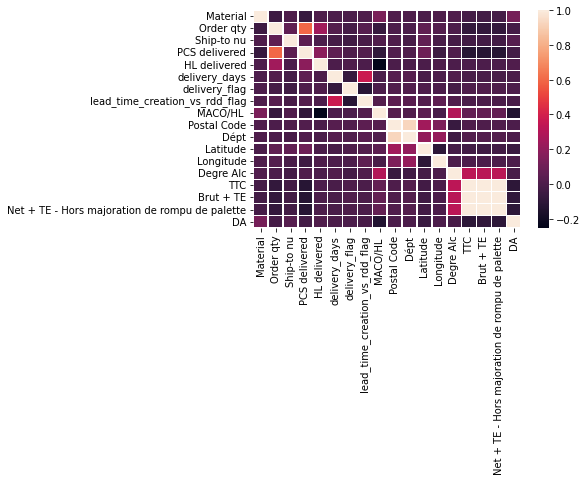

In [10]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5)
plt.yticks(rotation=0)
plt.show()

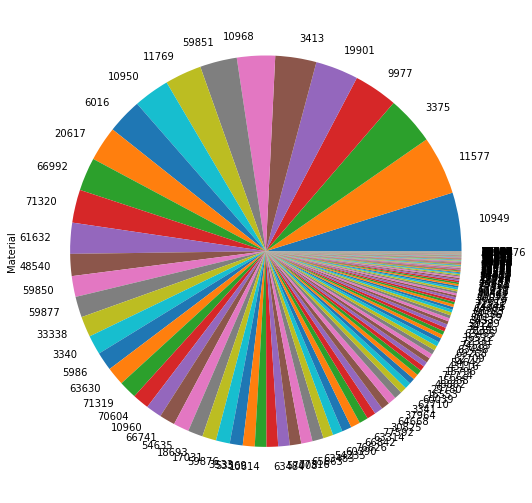

In [7]:
popularity_materials = df['Material'].value_counts().plot(kind='pie', figsize=(9,9))

## **Deleting reductant columns**

In [11]:
df.isna().sum()

Doc. Date                                                                     0
Material                                                                      0
Order qty                                                                     0
Ship-to nu                                                                    0
PCS delivered                                                                 0
HL delivered                                                                  0
delivery_days                                                                 0
delivery_flag                                                                 0
lead_time_creation_vs_rdd_flag                                                0
MACO/HL                                                                    4698
Groupement                                                                    0
Postal Code                                                                   0
Street                                  

In [12]:
df = df.drop(['lead_time_creation_vs_rdd_flag',
              'delivery_flag', 'delivery_days',
              'Postal Code', 'Street',
              'Sous groupement',
              'M2_Territory_ID',
              'M1_Territory_ID',
              'Dépt', 
              'Longitude', 'Latitude', 
              'Brut + TE', 
              'Net + TE - Hors majoration de rompu de palette',
              'DA',
              'Brand', 'Subrand',
              'SEGMENTS : Pils / Spécialités / Superspécialités/Bouteille Young adult',
              'Container Type', 'Container Size',
              'Variétés', 'Segment LE'], axis = 1)

## **Handling Missing Values**

In [13]:
df.isna().sum()

Doc. Date           0
Material            0
Order qty           0
Ship-to nu          0
PCS delivered       0
HL delivered        0
MACO/HL          4698
Groupement          0
Degre Alc           0
TTC                 0
dtype: int64

In [14]:
df['MACO/HL '].sort_values()

26431    30.345586
25411    30.345586
67446    30.345586
31633    30.345586
21745    30.345586
           ...    
73639          NaN
73641          NaN
73642          NaN
73655          NaN
73656          NaN
Name: MACO/HL , Length: 73670, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


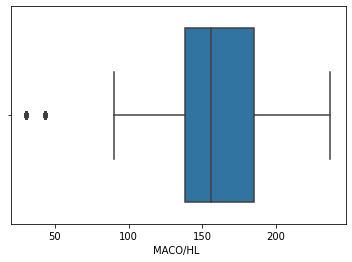

In [15]:
sns.boxplot(df['MACO/HL '] )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


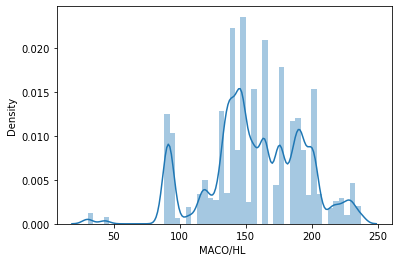

In [16]:
sns.distplot(df['MACO/HL '] )

In [17]:
df = df.fillna(df.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


## **Processing:**

In [18]:
categorical = ['Groupement', 'Doc. Date', 'Ship-to nu', 'Material']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    df[i] = le.fit_transform(df[i])

In [19]:
y = df['Material']
X = df.drop(['Material'], axis = 1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((58936, 9), (14734, 9), (58936,), (14734,))

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_trainnxt = pd.DataFrame(sc.fit_transform(X_train))
X_testnxt = pd.DataFrame(sc.transform(X_val))

X_trainnxt.columns = X_train.columns.values
X_testnxt.columns = X_val.columns.values

X_trainnxt.index = X_train.index.values
X_testnxt.index = X_val.index.values

X_train = X_trainnxt
X_val = X_testnxt

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = model.predict(X_val)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[193  14   0 ...   0   0   0]
 [ 16  69   0 ...   0   0   0]
 [  0   0 479 ...   0   0   0]
 ...
 [  0   0   0 ...   2   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       214
           1       0.82      0.77      0.79        90
           3       0.86      0.79      0.82       605
           4       0.95      1.00      0.98       492
           5       1.00      0.88      0.93        32
           6       0.31      0.32      0.31        38
           7       0.14      0.25      0.18         4
           8       0.58      0.62      0.60       164
          10       0.96      0.97      0.97       254
          11       0.91      1.00      0.95       402
          12       0.25      0.33      0.29         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         6
          15       0.96      1.00      0.98       5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1